In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

- 거주지의 인구 구조 시각화를 통한 인구 현황 분석
- 인구증가율, 인구밀도 분석 및 도시화 현황 분석
- 사회, 경제, 정책, 건강 등 여러 분야에 적용할 수 있는 인사이트를 도출

# 1. 데이터 확인

In [40]:
df = pd.read_csv('대웅_example/판다스입문_codes/data/202409_202409_주민등록인구및세대현황_월간.csv', encoding='euc-kr')

In [17]:
df

,행정구역,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
0,전국 (1000000000),"51,248,233","24,102,045",2.13,"25,517,454","25,730,779",0.99
1,서울특별시 (1100000000),"9,350,995","4,487,671",2.08,"4,515,791","4,835,204",0.93
2,부산광역시 (2600000000),"3,273,473","1,570,953",2.08,"1,593,783","1,679,690",0.95
3,대구광역시 (2700000000),"2,365,523","1,102,902",2.14,"1,160,812","1,204,711",0.96
4,인천광역시 (2800000000),"3,016,520","1,370,309",2.20,"1,507,439","1,509,081",1.00
5,광주광역시 (2900000000),"1,411,357","658,210",2.14,"696,711","714,646",0.97
6,대전광역시 (3000000000),"1,440,456","687,909",2.09,"718,109","722,347",0.99
7,울산광역시 (3100000000),"1,098,728","494,664",2.22,"565,067","533,661",1.06
8,세종특별자치시 (3600000000),"389,443","162,952",2.39,"193,854","195,589",0.99
9,경기도 (4100000000),"13,680,645","6,045,219",2.26,"6,877,300","6,803,345",1.01


# 2. 데이터 탐색

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   행정구역             18 non-null     object 
 1   2024년09월_총인구수    18 non-null     object 
 2   2024년09월_세대수     18 non-null     object 
 3   2024년09월_세대당 인구  18 non-null     float64
 4   2024년09월_남자 인구수  18 non-null     object 
 5   2024년09월_여자 인구수  18 non-null     object 
 6   2024년09월_남여 비율   18 non-null     float64
dtypes: float64(2), object(5)
memory usage: 1.1+ KB


In [23]:
df.shape

(18, 7)

In [27]:
df.index

RangeIndex(start=0, stop=18, step=1)

In [29]:
df.columns

Index(['행정구역', '2024년09월_총인구수', '2024년09월_세대수', '2024년09월_세대당 인구',
       '2024년09월_남자 인구수', '2024년09월_여자 인구수', '2024년09월_남여 비율'],
      dtype='object')

In [31]:
df.values

array([['전국  (1000000000)', '51,248,233', '24,102,045', 2.13,
        '25,517,454', '25,730,779', 0.99],
       ['서울특별시  (1100000000)', '9,350,995', '4,487,671', 2.08,
        '4,515,791', '4,835,204', 0.93],
       ['부산광역시  (2600000000)', '3,273,473', '1,570,953', 2.08,
        '1,593,783', '1,679,690', 0.95],
       ['대구광역시  (2700000000)', '2,365,523', '1,102,902', 2.14,
        '1,160,812', '1,204,711', 0.96],
       ['인천광역시  (2800000000)', '3,016,520', '1,370,309', 2.2,
        '1,507,439', '1,509,081', 1.0],
       ['광주광역시  (2900000000)', '1,411,357', '658,210', 2.14, '696,711',
        '714,646', 0.97],
       ['대전광역시  (3000000000)', '1,440,456', '687,909', 2.09, '718,109',
        '722,347', 0.99],
       ['울산광역시  (3100000000)', '1,098,728', '494,664', 2.22, '565,067',
        '533,661', 1.06],
       ['세종특별자치시  (3600000000)', '389,443', '162,952', 2.39, '193,854',
        '195,589', 0.99],
       ['경기도  (4100000000)', '13,680,645', '6,045,219', 2.26,
        '6,877,300', '6,803

In [33]:
df.isnull().sum()

행정구역               0
2024년09월_총인구수      0
2024년09월_세대수       0
2024년09월_세대당 인구    0
2024년09월_남자 인구수    0
2024년09월_여자 인구수    0
2024년09월_남여 비율     0
dtype: int64

In [35]:
df.describe()

,2024년09월_세대당 인구,2024년09월_남여 비율
count,18.000000,18.000000
mean,2.107778,1.000000
std,0.110590,0.033781
min,1.960000,0.930000
25%,2.022500,0.990000
50%,2.095000,1.000000
75%,2.140000,1.020000
max,2.390000,1.060000


# 3. 데이터 전처리 수행

In [45]:
# 쉼표 제거 후 숫자형으로 변환
df['2024년09월_총인구수'] = df['2024년09월_총인구수'].str.replace(',', '').astype(int)
df['2024년09월_세대수'] = df['2024년09월_세대수'].str.replace(',', '').astype(int)
df['2024년09월_남자 인구수'] = df['2024년09월_남자 인구수'].str.replace(',', '').astype(int)
df['2024년09월_여자 인구수'] = df['2024년09월_여자 인구수'].str.replace(',', '').astype(int)

In [66]:
# 행정구역에서 괄호와 그 안의 숫자를 제거
df['행정구역'] = df['행정구역'].str.replace(r'\s*\(.*?\)', '', regex=True)

- regex = True는 정규 표현식을 사용할 수 있도록 하는 것
- r''은 정규 표현식으로 인식
- \s*는 공백이 있든 없든 괄호 앞의 공백을 포함해 제거
- \(와 \)는 각각 여는  괄호와 닫는 괄호를 의미
- .*?는 괄호 안에 있는 모든 문자를 의미하고, ?는 최소한 가능하게 문자를 선택
- ''은 찾은 내용을 삭제

컬럼을 굳이 삭제를 하지 않은 이유는 총 인구수와 세대수, 남녀 인구수를 가지고 계산한 컬럼들도 있어서 모두 유의미하다고 판단했기 때문에 삭제를 진행했다.

In [114]:
# 세대수 대비 인구수 비율 계산
data['세대수 대비 인구수'] = data['총인구수'] / data['세대수']

,행정구역,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
0,전국,51248233,24102045,2.13,25517454,25730779,0.99
1,서울특별시,9350995,4487671,2.08,4515791,4835204,0.93
2,부산광역시,3273473,1570953,2.08,1593783,1679690,0.95
3,대구광역시,2365523,1102902,2.14,1160812,1204711,0.96
4,인천광역시,3016520,1370309,2.20,1507439,1509081,1.00
5,광주광역시,1411357,658210,2.14,696711,714646,0.97
6,대전광역시,1440456,687909,2.09,718109,722347,0.99
7,울산광역시,1098728,494664,2.22,565067,533661,1.06
8,세종특별자치시,389443,162952,2.39,193854,195589,0.99
9,경기도,13680645,6045219,2.26,6877300,6803345,1.01


# 4. 시각화

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm

# # 사용 가능한 폰트 목록 출력
# for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
#     print(fm.FontProperties(fname=font).get_name())

# # 한글 폰트 설정
# plt.rcParams['font.family'] = 'Arial'
# # 마이너스 기호 깨짐 방지
# plt.rcParams['axes.unicode_minus'] = False

# Gulim 폰트 경로를 직접 지정 (예: Windows의 경우)
font_path = "C:/Windows/Fonts/gulim.ttc"  # 'gulim.ttc' 파일 경로 확인 후 설정
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

sns.set(style='whitegrid')

Castellar
Palatino Linotype
Bell MT
Book Antiqua
Segoe UI Emoji
Times New Roman
Trebuchet MS
Curlz MT
Microsoft YaHei
Tempus Sans ITC
Maiandra GD
Rage Italic
Microsoft JhengHei
Felix Titling
Sylfaen
Corbel
Bodoni MT
Segoe Print
Bradley Hand ITC
MingLiU-ExtB
Snap ITC
Georgia
Gigi
Century Gothic
Candara
Rockwell
Arial
Impact
Bookman Old Style
Gloucester MT Extra Condensed
Courier New
Franklin Gothic Book
Copperplate Gothic Light
Lucida Handwriting
Leelawadee UI
Courier New
Candara
Verdana
Consolas
Gill Sans MT
Microsoft Uighur
MS Reference Specialty
Microsoft New Tai Lue
Bell MT
Modern No. 20
Perpetua
Segoe MDL2 Assets
Vladimir Script
Calibri
Papyrus
Franklin Gothic Heavy
Arial
Corbel
Pyunji R
Segoe UI
Kunstler Script
Microsoft PhagsPa
Calibri
HYGothic-Medium
Franklin Gothic Medium
Gadugi
Bodoni MT
Corbel
MT Extra
Segoe UI
Nirmala UI
Courier New
MS Gothic
Berlin Sans FB
Bodoni MT
Franklin Gothic Demi
Microsoft YaHei
Brush Script MT
Perpetua
Segoe UI Variable
Centaur
Ravie
Dubai
Gill Sans

In [276]:
df.describe()

,2024년09월_총인구수,2024년09월_세대수,2024년09월_세대당 인구,2024년09월_남자 인구수,2024년09월_여자 인구수,2024년09월_남여 비율
count,1.800000e+01,1.800000e+01,18.000000,1.800000e+01,1.800000e+01,18.000000
mean,5.694248e+06,2.678005e+06,2.107778,2.835273e+06,2.858975e+06,1.000000
std,1.183505e+07,5.547951e+06,0.110590,5.891530e+06,5.943801e+06,0.033781
min,3.894430e+05,1.629520e+05,1.960000,1.938540e+05,1.955890e+05,0.930000
25%,1.460444e+06,7.071828e+05,2.022500,7.297195e+05,7.307250e+05,0.990000
50%,1.963434e+06,9.813875e+05,2.095000,9.995305e+05,9.639040e+05,1.000000
75%,3.178353e+06,1.494860e+06,2.140000,1.572197e+06,1.580011e+06,1.020000
max,5.124823e+07,2.410204e+07,2.390000,2.551745e+07,2.573078e+07,1.060000


In [189]:
# y축 값 단위를 백만 단위로 설정하는 함수
def millions(x, pos):
    return f'{int(x / 1e6)}M'  # 백만(M)을 붙여서 표시

## Hist

## 남녀 비율 분포

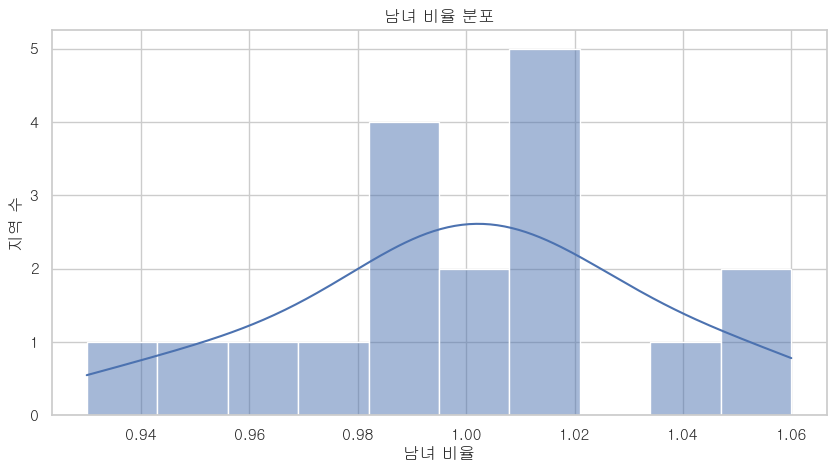

In [240]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df['2024년09월_남여 비율'], bins=10, kde=True)
plt.xlabel('남녀 비율')
plt.ylabel('지역 수')
plt.title('남녀 비율 분포')
plt.show()

남녀 비율은 남성 인구수를 여성 인구수로 나눈 값으로, 이 값이 1에 가까울수록 남녀 인구가 균형을 이룬다.<br>
전체적으로 대부분 지역에서 남녀 비율이 1에 가깝고, 남녀 인구가 균형을 이루고 있다.<br>
일부 성비 불균형 지역이 있지만, 극단적인 불균형은 나타나지 않는다.<br>

## 세대당 인구수 분포

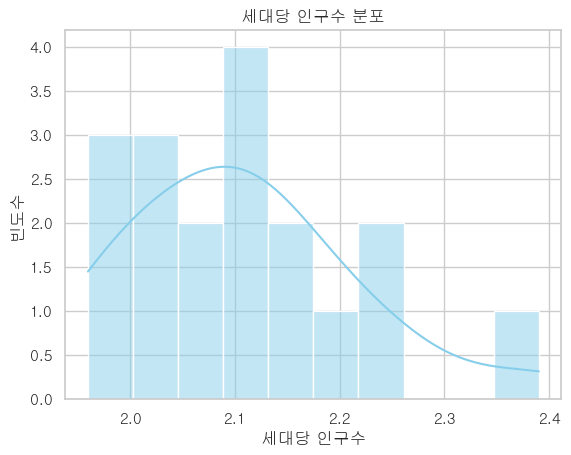

In [242]:
# 세대당 인구수 분포 히스토그램
sns.histplot(data=df['2024년09월_세대당 인구'], bins=10, color='skyblue', kde=True)
plt.xlabel('세대당 인구수')
plt.ylabel('빈도수')
plt.title('세대당 인구수 분포')
plt.show()

이 분포를 통해 일반적인 가족 구성의 크기를 추정할 수 있다.
세대당 인구수 평균은 약 2.1명에 위치. 전체적으로 세대당 인구수의 변동폭이 크지 않은데 2.3 이상인 곳은 큰 가족을 구성을 한다는 뜻인데 상대적으로 적다.

## 총 인구수 분포

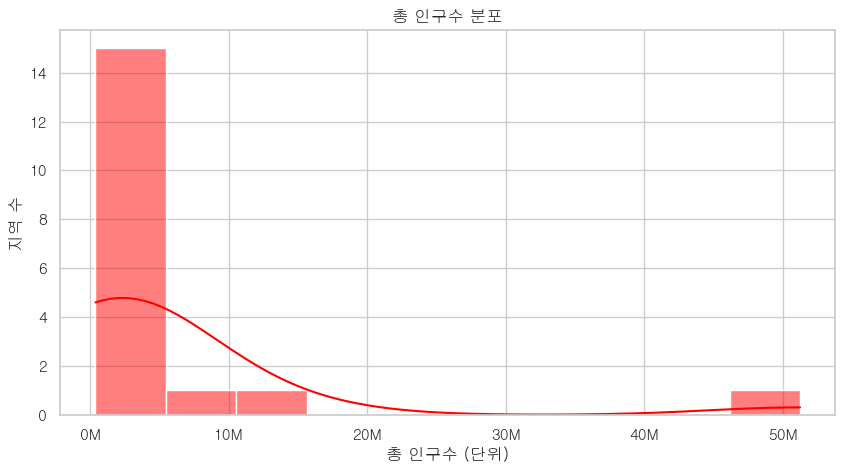

In [244]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df['2024년09월_총인구수'], bins=10, color='red', kde=True)
plt.xlabel('총 인구수 (단위)')
plt.ylabel('지역 수')
plt.title('총 인구수 분포')
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

인구 규모가 작은 지역과 큰 지역이 얼마나 있는지, 인구가 어떻게 분포되어 있는지 알 수 있다.<br>
대부분의 지역은 인구수가 낮고 소수의 지역만 인구가 많다는 것을 알 수 있다.<br>
결국, 인구가 특정 지역에 도시 집중화 현상을 알 수 있으며, 대도시와 나머지 지역의 인구 격차가 크다는 것을 의미.

## 막대그래프

## 지역별 총 인구수

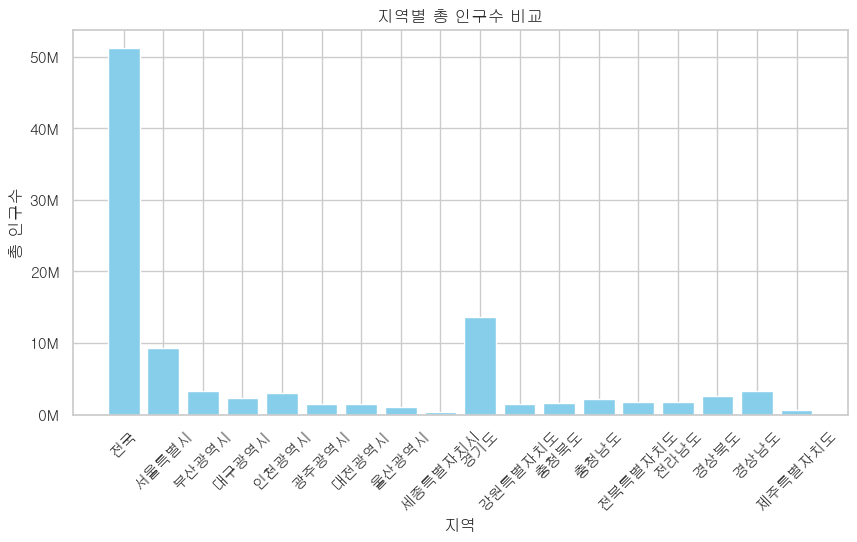

In [268]:
plt.figure(figsize=(10, 5))
plt.bar(df['행정구역'], df['2024년09월_총인구수'], color='skyblue')
plt.xlabel('지역')
plt.ylabel('총 인구수')
plt.title('지역별 총 인구수 비교')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

각 지역의 총 인구수를 막대그래프를 이용해 어느 지역에 인구가 많이 집중되어 있는지 알 수 있다.

## 지역별 세대수

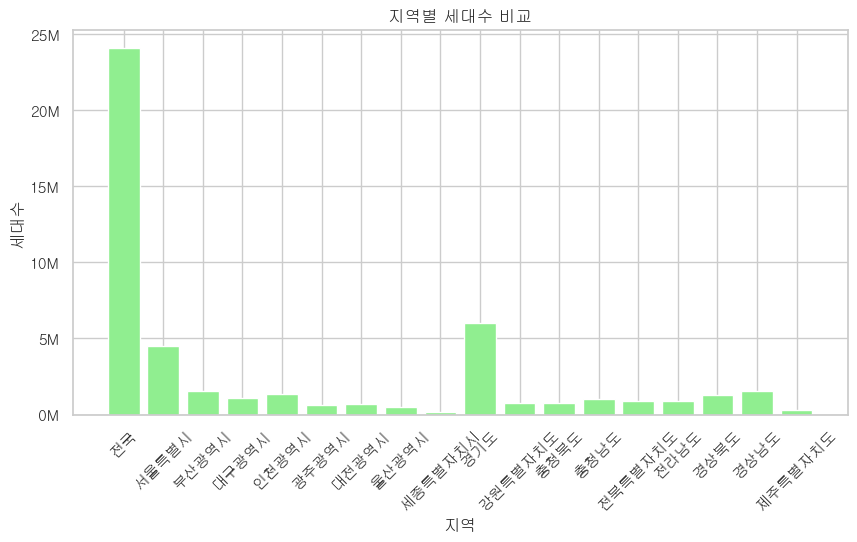

In [280]:
plt.figure(figsize=(10, 5))
plt.bar(df['행정구역'], df['2024년09월_세대수'], color='lightgreen')
plt.xlabel('지역')
plt.ylabel('세대수')
plt.title('지역별 세대수 비교')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

지역마다 세대수를 비교하여 가구 수가 많은 지역과 적은 지역을 확인할 수 있다.

## 지역별 세대수 대비 인구수

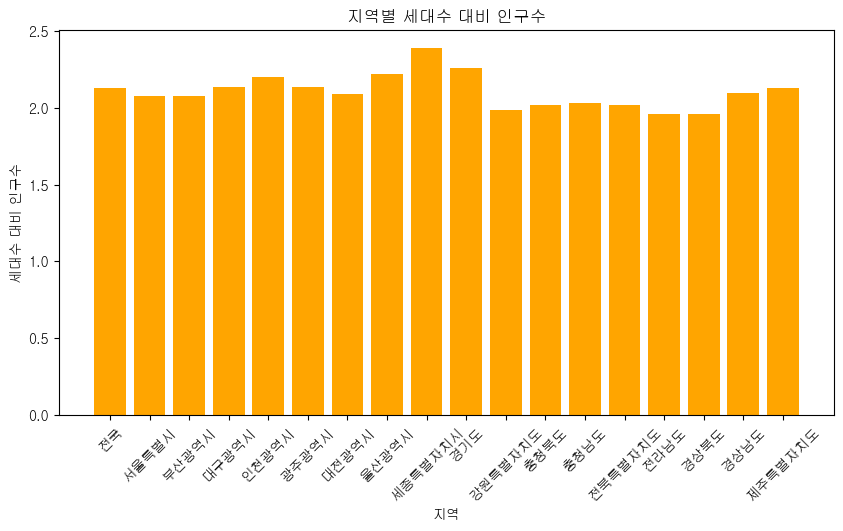

In [180]:
# 지역별 세대수 대비 인구수
plt.figure(figsize=(10, 5))
plt.bar(df['행정구역'], df['2024년09월_세대당 인구'], color='orange')
plt.xlabel('지역')
plt.ylabel('세대수 대비 인구수')
plt.title('지역별 세대수 대비 인구수')
plt.xticks(rotation=45)
plt.show()

지역별 세대당 인구수를 보여주는 막대그래프이고, 세대당 평균 인구수를 비교하고 있다.<br>
대부분의 지역에서 세대당 인구수는 비슷하고, 2명 내외로 결과를 확인할 수 있다.<br>
대도시에서는 세대당 인구수가 약간 낮고, 일부 신도시나 중소도시(세종시 등)는 높은 세대당 인구수를 확인할 수 있다.

## 지역별 남녀 인구수 비율

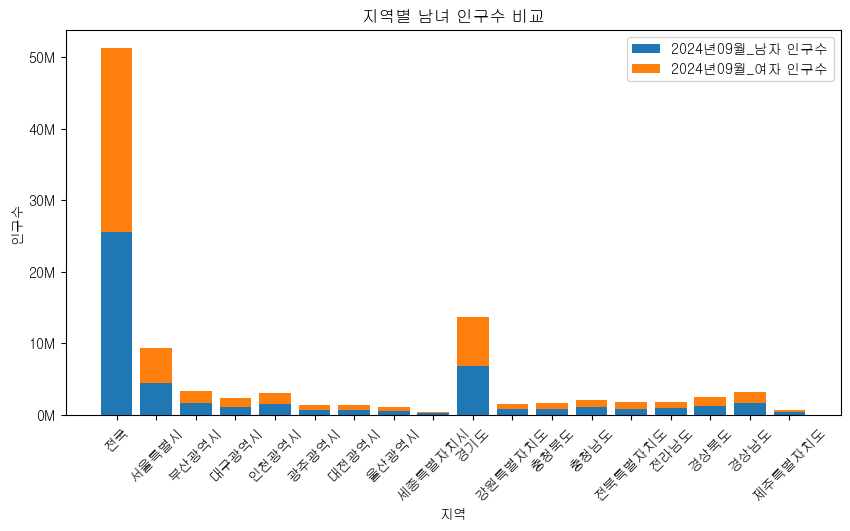

In [177]:
# y축 값 단위를 백만 단위로 설정하는 함수
def millions(x, pos):
    return f'{int(x / 1e6)}M'  # 백만(M)을 붙여서 표시

# 지역별 남녀 인구수 비율 비교 그래프
plt.figure(figsize=(10, 5))
plt.bar(df['행정구역'], df['2024년09월_남자 인구수'], label='2024년09월_남자 인구수')
plt.bar(df['행정구역'], df['2024년09월_여자 인구수'], bottom=df['2024년09월_남자 인구수'], label='2024년09월_여자 인구수')
plt.xlabel('지역')
plt.ylabel('인구수')
plt.title('지역별 남녀 인구수 비교')
plt.xticks(rotation=45)
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

전국 인구가 특정 대도시에 집중되어 있다. 서울, 부산, 경기도, 인천 등에 인구가 많이 분포되어 있다.
남녀 비율은 모든 지역에서 비율이 비슷한 분포를 보인다.

## 지역별 남녀 비율

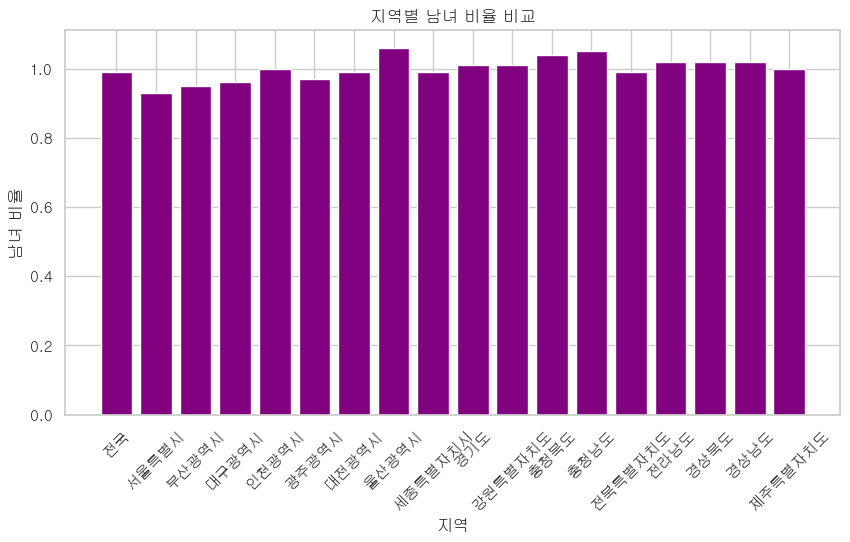

In [285]:
plt.figure(figsize=(10, 5))
plt.bar(df['행정구역'], df['2024년09월_남여 비율'], color='purple')
plt.xlabel('지역')
plt.ylabel('남녀 비율')
plt.title('지역별 남녀 비율 비교')
plt.xticks(rotation=45)
plt.show()

지역별 남녀 비율을 보여주는 막대그래프로, 각 지역별 남녀 비율을 비교하고 있다. 여기서 남녀 비율은 일반적으로 남성 인구수를 여성 인구수로 나눈 값이다. 이 값이 1에 가까울수록 남녀 인구가 균형을 이룬다.<br>
대부분의 지역에서 남녀 비율이 균형을 이루고 있어, 성비 불균형이 나타나지 않는다.<br>

## HeatMap

In [295]:
# 주요 변수들만 선택하여 히트맵에 사용할 데이터 준비
heatmap_df = df.set_index('행정구역')[['2024년09월_총인구수', '2024년09월_남자 인구수', 
                                                '2024년09월_여자 인구수', '2024년09월_세대수', 
                                                '2024년09월_세대당 인구', '2024년09월_남여 비율']]

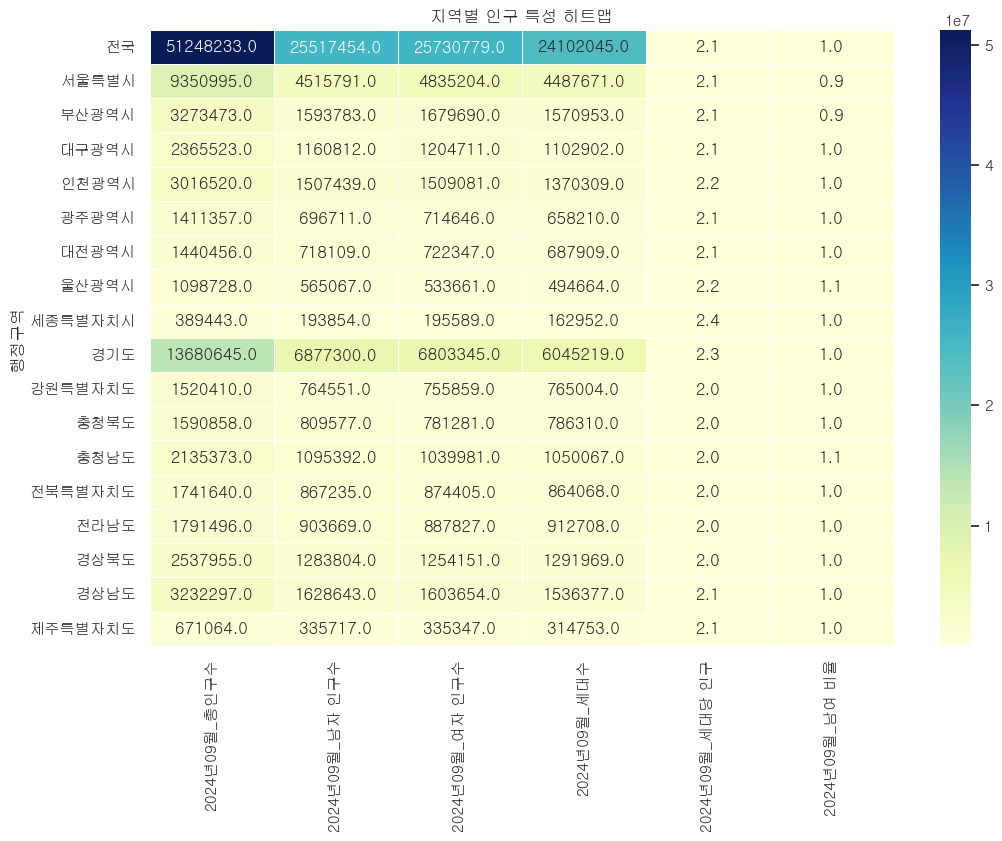

In [301]:
# 전처리한 데이터 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('지역별 인구 특성 히트맵')
plt.show()

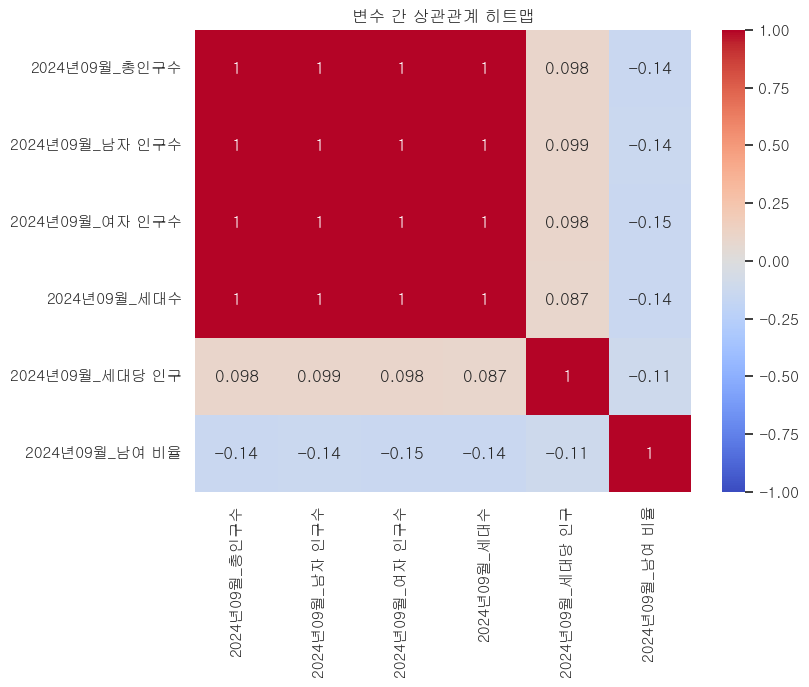

In [305]:
# 상관관계 히트맵
# 변수 간 상관관계 계산
corr_matrix = heatmap_df.corr()

# 상관관계 히트맵 생성
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('변수 간 상관관계 히트맵')
plt.show()

- 총 인구수, 남자 인구수, 여자 인구수, 세대수는 강한 양의 상관관계(1)이 나타나며, 인구가 많은 지역일수록 남녀 인구와 세대수가 많다는 것을 알 수 있다.
- 세대당 인구수는 0.098, 0.087이라는 매우 약한 상관관계를 가져서, 다른 변수와 거의 관련이 없는 것을 알 수 있다. 세대당 인구수가 지역의 전체 인구 규모나 세대수와 관련이 없음(독립적)을 알 수 있다.
- 남녀 비율은 다른 변수들과 약한 음의 상관관계를 가진다. 남녀 비율이 낮을수록 남자 인구가 상대적으로 적은 경향이며, 남녀 비율이 큰 변수와 밀접한 연관성은 없다. 따라서, 남녀 비율이 인구수와 세대수에 큰 영향을 미치지 않는다는 것을 알 수 있다.

## 상자그림

### 지역별 세대당 인구수

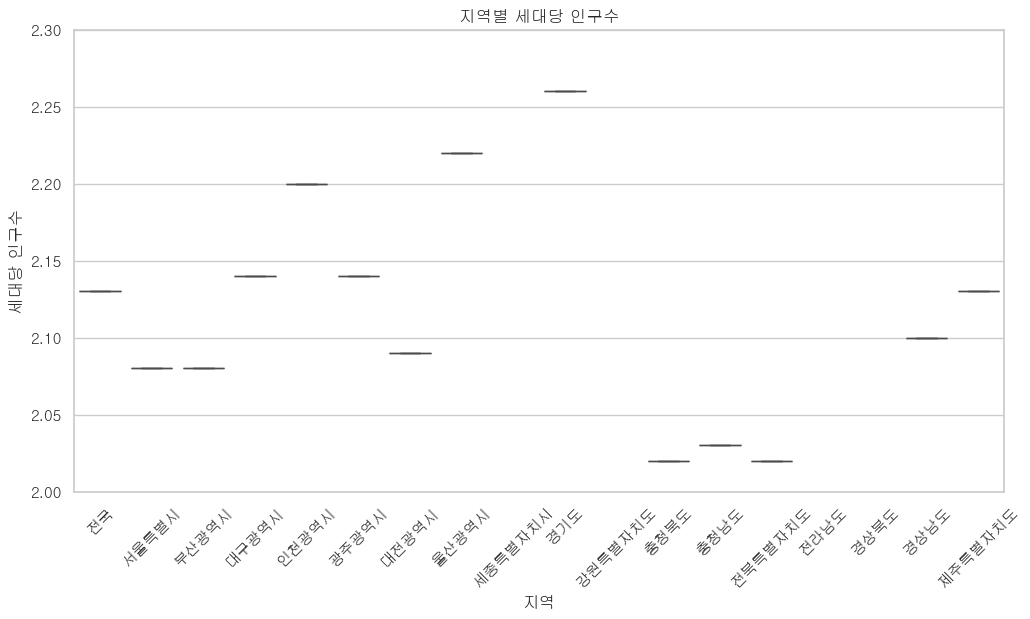

In [326]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df,x='행정구역', y='2024년09월_세대당 인구')
plt.ylim(2.0, 2.3)  # y축 범위를 2.0에서 2.3으로 조정
plt.xticks(rotation=45)
plt.xlabel('지역')
plt.ylabel('세대당 인구수')
plt.title('지역별 세대당 인구수')
plt.show()

- 대부분의 지역에서 세대당 인구수는 2.0에서 2.2 사이에 분포하고 있다. 각 지역의 평균 세대당 인구수가 비슷한 수준인 것을 알 수 있는데, 일부 지역에서는 세대당 인구수가 약간 더 높은 값을 가지며, 특히 세종 특별자치시가 다른 지역보다 상대적으로 높은 세대당 인구수를 보여준다.
- 이상치는 크게 눈에 띄는 지역은 없다.
- 중앙값은 그래프상에 세종특별자치시가 높게 보이긴 하지만 수치상 지역별 크게 차이가 나진 않는다.